# BSRT and jitter in the emittances reading

In the cell below we import one of the last fills (**8491**) of Run2 after the last BSRT calibration run (**8479**, https://lpc.web.cern.ch/cgi-bin/fillTable.py?year=2022).

Let us consider for simplicity the emittances evolution during STABLE. At top energy the measurement is more challenging given the lower geometrical emittance.

In [1]:
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as md
from matplotlib import cm
from dask import dataframe as dd

my_fill = 8491

my_BSRT_list = [
    'LHC.BSRT.5R4.B1:BUNCH_EMITTANCE_H',
    'LHC.BSRT.5R4.B1:BUNCH_EMITTANCE_V',
    'LHC.BSRT.5L4.B2:BUNCH_EMITTANCE_H',
    'LHC.BSRT.5L4.B2:BUNCH_EMITTANCE_V',
]

my_columns_list = [
    'HX:BMODE',
    'HX:FILLN',
] + my_BSRT_list 


def pandas_index_localize(df):
    df.index = df.index.map(lambda x: pd.Timestamp(x).tz_localize('UTC'))
    return df

my_files = glob.glob(f'/eos/project/l/lhc-lumimod/LuminosityFollowUp/2022_dev/rawdata/HX:FILLN={my_fill}/HX:BMODE=STABLE/*')


# Recently downloaded (30 Nov 2022)
#my_files = glob.glob(f'/home/sterbini/japw22_lifetime/8491_BSRT.parquet')

my_df = pandas_index_localize(dd.read_parquet(my_files, columns=my_columns_list).compute().sort_index())

Let us consider now the bunch ID 418 (for B1 and B2).

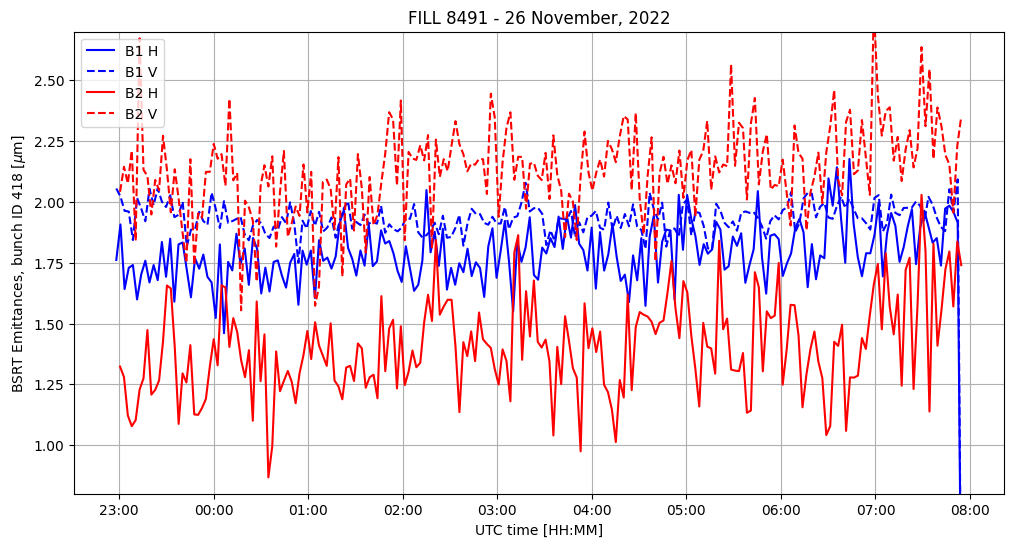

In [2]:
bunch_id = 418

fig, (ax) = plt.subplots(figsize = [12,6], nrows=1)
for ii, jj, zz in zip(my_BSRT_list[0:4], ['b','b--','r','r--'], ['B1 H', 'B1 V', 'B2 H', 'B2 V']):
    #for jj in range(100):
        
        plt.plot(my_df[ii].dropna().apply(lambda x: x[bunch_id]), jj, label = zz)

xfmt = md.DateFormatter('%H:%M')
plt.title(f'FILL {my_fill} - {pd.Timestamp(my_df.index.values[0]).strftime("%d %B, %Y")}')
plt.xlabel('UTC time [HH:MM]')
plt.ylabel(f'BSRT Emittances, bunch ID { bunch_id} [$\mu$m]')
#xlim_1 = pd.Timestamp('2022-11-26 23:30')
#xlim_2 = pd.Timestamp('2022-11-27 07:30')
#plt.xlim(xlim_1, xlim_2)
plt.ylim(.8, 2.7)

plt.gca().xaxis.set_major_formatter(xfmt)
plt.legend(loc = 'best')
plt.grid(True)

We can see that along the 9 h of STABLE there is a significant jitter of the observed emittance. This is not physical and it is assumed to be an instrumental artefact.

We can compute the average BBB emittances BUT still is very difficult to conclude.

/tmp/ipykernel_118476/2303725134.py:2: RuntimeWarning: Mean of empty slice.
  return x[np.nonzero(x)].mean()


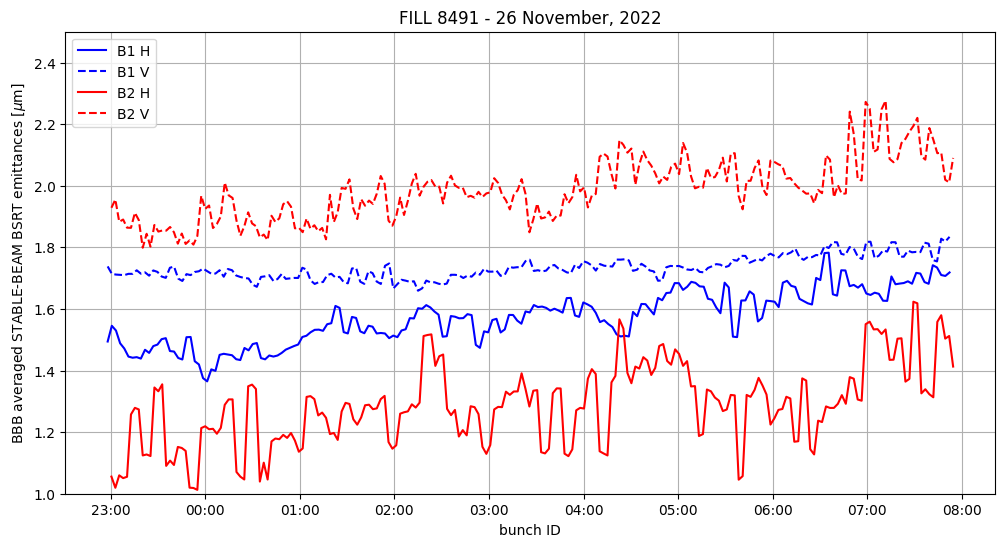

In [3]:
def my_average(x):
    return x[np.nonzero(x)].mean()
fig, (ax) = plt.subplots(figsize = [12,6], nrows=1)
for ii, jj, zz in zip(my_BSRT_list[0:4], ['b','b--','r','r--'], ['B1 H', 'B1 V', 'B2 H', 'B2 V']):
    plt.plot(my_df[ii].dropna().apply(lambda x : my_average(x)), jj, label=zz)
plt.ylim(1,2.5)
plt.title(f'FILL {my_fill} - {pd.Timestamp(my_df.index.values[0]).strftime("%d %B, %Y")}')
plt.xlabel('bunch ID')
plt.ylabel(f'BBB averaged STABLE-BEAM BSRT emittances [$\mu$m]')
plt.legend(loc = 'best')
plt.grid(True)
xfmt = md.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(xfmt)

If we assume a negligible emittance blow up along the STABLE, we can average on time the measurements to see a bunch-by-bungh trend.

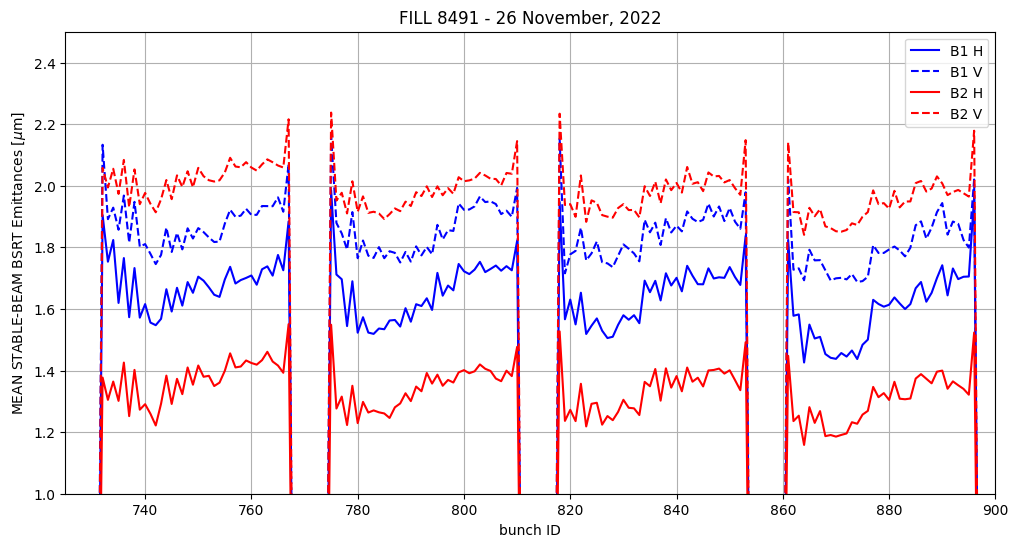

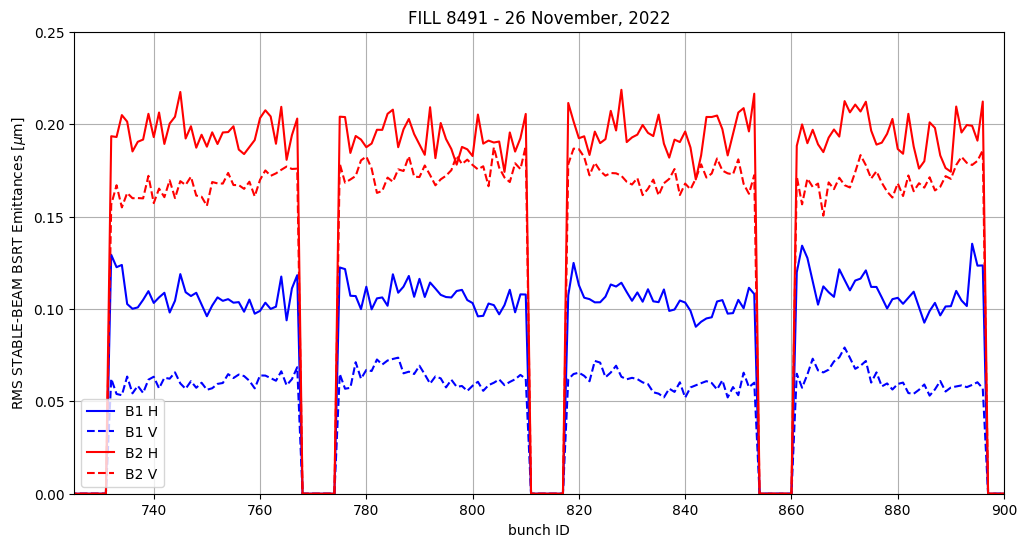

In [4]:
fig, (ax) = plt.subplots(figsize = [12,6], nrows=1)
for ii, jj, zz in zip(my_BSRT_list[0:4], ['b','b--','r','r--'], ['B1 H', 'B1 V', 'B2 H', 'B2 V']):
    plt.plot(pd.DataFrame(np.vstack(my_df[ii].dropna().to_numpy()[:-1])).mean(axis=0), jj, label=zz)
plt.ylim(1,2.5)
plt.xlim(725,900)
plt.title(f'FILL {my_fill} - {pd.Timestamp(my_df.index.values[0]).strftime("%d %B, %Y")}')
plt.xlabel('bunch ID')
plt.ylabel(f'MEAN STABLE-BEAM BSRT Emittances [$\mu$m]')
#xlim_1 = pd.Timestamp('2022-11-26 23:30')
#xlim_2 = pd.Timestamp('2022-11-27 07:30')
#plt.xlim(xlim_1, xlim_2)
plt.legend(loc = 'best')
plt.grid(True)

fig, (ax) = plt.subplots(figsize = [12,6], nrows=1)
for ii, jj, zz in zip(my_BSRT_list[0:4], ['b','b--','r','r--'], ['B1 H', 'B1 V', 'B2 H', 'B2 V']):
    plt.plot(pd.DataFrame(np.vstack(my_df[ii].dropna().to_numpy()[:-1])).std(axis=0), jj, label=zz)
plt.ylim(0,0.25)
plt.xlim(70,3565)
plt.xlim(725,900)

plt.title(f'FILL {my_fill} - {pd.Timestamp(my_df.index.values[0]).strftime("%d %B, %Y")}')
plt.xlabel('bunch ID')
plt.ylabel(f'RMS STABLE-BEAM BSRT Emittances [$\mu$m]')
#xlim_1 = pd.Timestamp('2022-11-26 23:30')
#xlim_2 = pd.Timestamp('2022-11-27 07:30')
#plt.xlim(xlim_1, xlim_2)
plt.legend(loc = 'best')
plt.grid(True)


# Comparing with RUN2 
Let us consider a 2018 FILL (7334, see https://lpc.web.cern.ch/cgi-bin/fillTable.py?year=2018 with 25ns_2556b_2544_2215_2332_144bpi_20iniV3).
The FILL 7334 was the last proton operational fill of 2018.
For ease the comparison, we consider only 8 h of the STABLE.

In [5]:
# this parquet is on sterbini@pcbe-abp-hpc002:~/japw22_lifetime
# you can download it by using 001_fullSpark.py 
my_df_old = pandas_index_localize(dd.read_parquet('./7334.parquet').compute().sort_index())

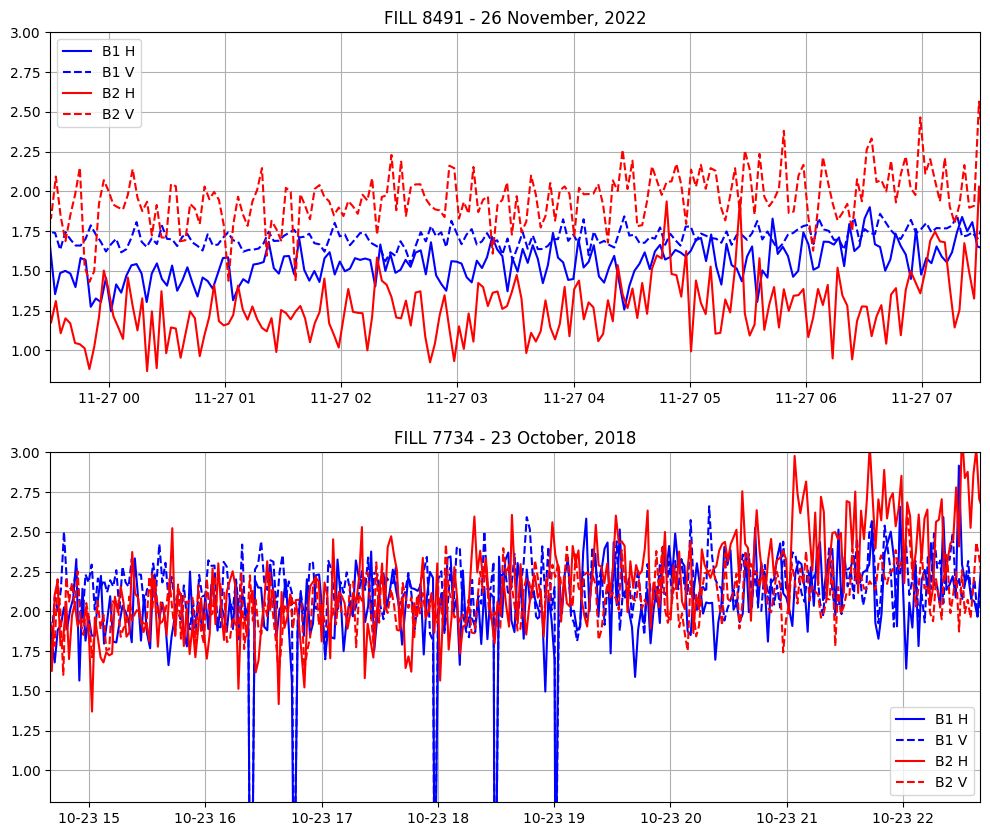

In [6]:
fig, (ax) = plt.subplots(figsize = [12,10], nrows=2)
plt.subplot(211)

for ii, jj, zz in zip(my_BSRT_list, ['b','b--','r','r--'], ['B1 H', 'B1 V', 'B2 H', 'B2 V']):
    plt.plot(my_df[ii].dropna().apply(lambda x: x[400]), jj, label=zz)
plt.ylim(.8, 3)
xlim_1 = pd.Timestamp('2022-11-26 23:30')
xlim_2 = pd.Timestamp('2022-11-27 07:30')
plt.xlim(xlim_1, xlim_2)
plt.grid()
plt.title(f'FILL {my_fill} - {pd.Timestamp(my_df.index.values[0]).strftime("%d %B, %Y")}')
plt.legend(loc='best')

plt.subplot(212)
for ii, jj, zz in zip(my_BSRT_list, ['b','b--','r','r--'], ['B1 H', 'B1 V', 'B2 H', 'B2 V']):
    plt.plot(my_df_old[ii].dropna().apply(lambda x: x[400]), jj, label=zz)
xlim_1 = pd.Timestamp('2018-10-23 14:40')
xlim_2 = pd.Timestamp('2018-10-23 22:40')
plt.xlim(xlim_1, xlim_2)
plt.ylim(.8, 3)
plt.grid()
plt.title(f'FILL 7734 - {pd.Timestamp(my_df_old.index.values[0]).strftime("%d %B, %Y")}')
plt.legend(loc='best');

The number of the bunches of the two fills is similar. 

In [7]:
# bunch numbers in the two "reference" fill
my_beam_plane = 'LHC.BSRT.5L4.B2:BUNCH_EMITTANCE_H'
print(f'Fill {my_fill} (end of Run 3) had {np.sum(my_df[my_beam_plane].dropna().iloc[0]>0)} bunches.')
print(f'Fill 7734 (end of Run 2) had {np.sum(my_df_old[my_beam_plane].dropna().iloc[10]>0)} bunches.')

Fill 8491 (end of Run 3) had 2390 bunches.
Fill 7734 (end of Run 2) had 2556 bunches.


In [8]:
print(f'In fill {my_fill}  (end of Run 3), the BSRT published {len(my_df[my_beam_plane].dropna().between_time("00:00","07:00"))/7:2.1f} times/h.')
print(f'In fill 7734  (end of Run 2), the BSRT published {len(my_df_old[my_beam_plane].dropna().between_time("15:00","22:00"))/7:2.1f} times/h.')

In fill 8491  (end of Run 3), the BSRT published 24.1 times/h.
In fill 7734  (end of Run 2), the BSRT published 40.0 times/h.


Despite the jitter was already visible in 2018, the smaller emittances observed in 2022 and the (almost) halved sampling rate, are presently limiting the emittance analysis.